# BANK MARKETING ML PROJECT 

## The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# DATASET INFORMATION

## > Multivariate dataset 
## > Feature Type - Categorical, Integer
## > Classification
## > Rows  - 45211
## > Coloumns - 16


In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Load Dataset

In [4]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [108]:
df.describe

<bound method NDFrame.describe of             age  job  marital  education  default  housing  loan  contact  \
0      0.493506    3        1          0        0        0     0        1   
2      0.246753    7        1          3        0        1     0        1   
3      0.285714    0        1          1        0        0     0        1   
4      0.493506    7        1          3        0        0     1        1   
6      0.532468    0        1          5        0        0     0        1   
...         ...  ...      ...        ...      ...      ...   ...      ...   
41183  0.714286    5        1          5        0        1     0        0   
41184  0.363636    1        1          5        0        0     0        0   
41185  0.493506    5        1          6        0        1     0        0   
41186  0.337662    9        1          5        0        0     0        0   
41187  0.727273    5        1          5        0        1     0        0   

       month day_of_week  ...  campaign  

In [10]:
# Select numerical columns
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

# Before removing outlayers

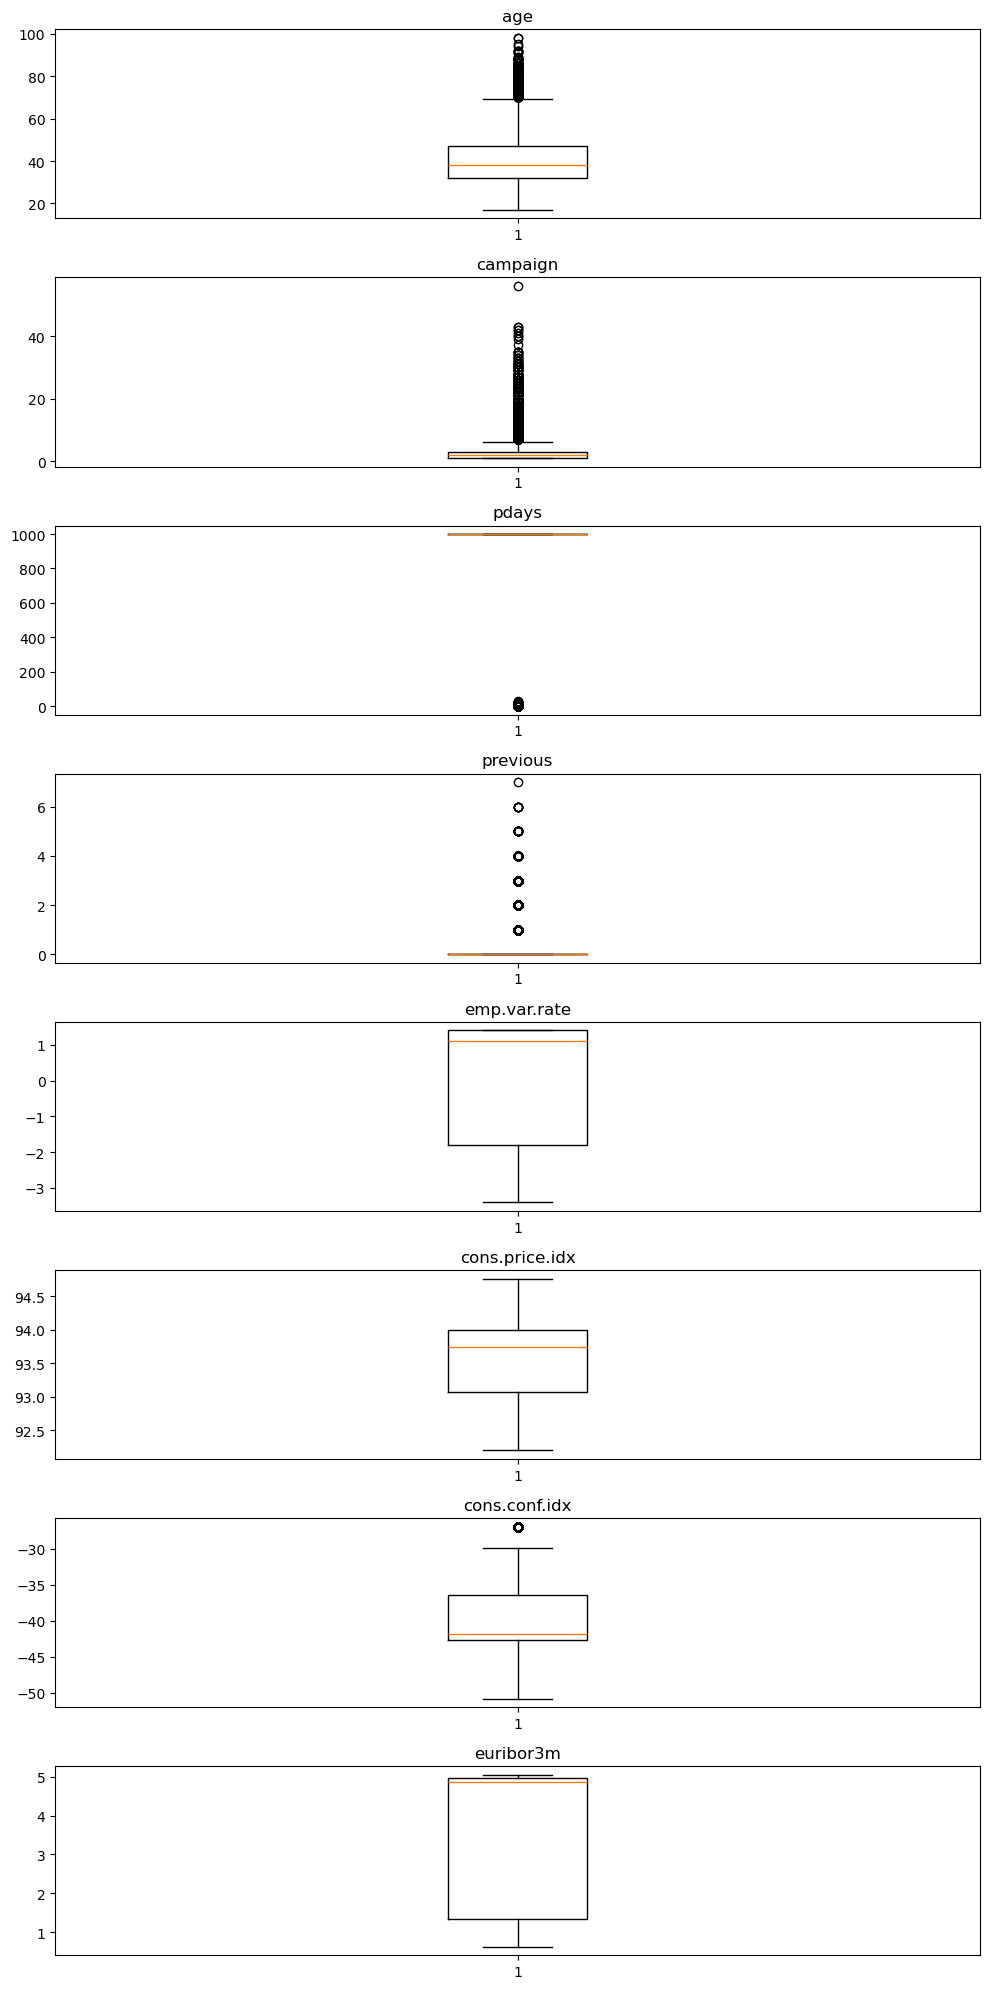

In [12]:
# Create box plots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 20))
for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [14]:
# Select numerical columns
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

In [16]:
# Calculate Q1 and Q3 for each numerical column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

# Calculate IQR for each numerical column
IQR = Q3 - Q1

# Remove outliers for each numerical column
for col in numerical_cols:
    df = df[~((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col])))]


In [18]:
# Print the updated dataset
print(df)


       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41180   36       admin.  married    university.degree       no      no   no   
41181   37       admin.  married    university.degree       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   

         contact month day_of_week  ...  campaign  

In [20]:
df.shape

(32765, 21)

# After Removing outlayers

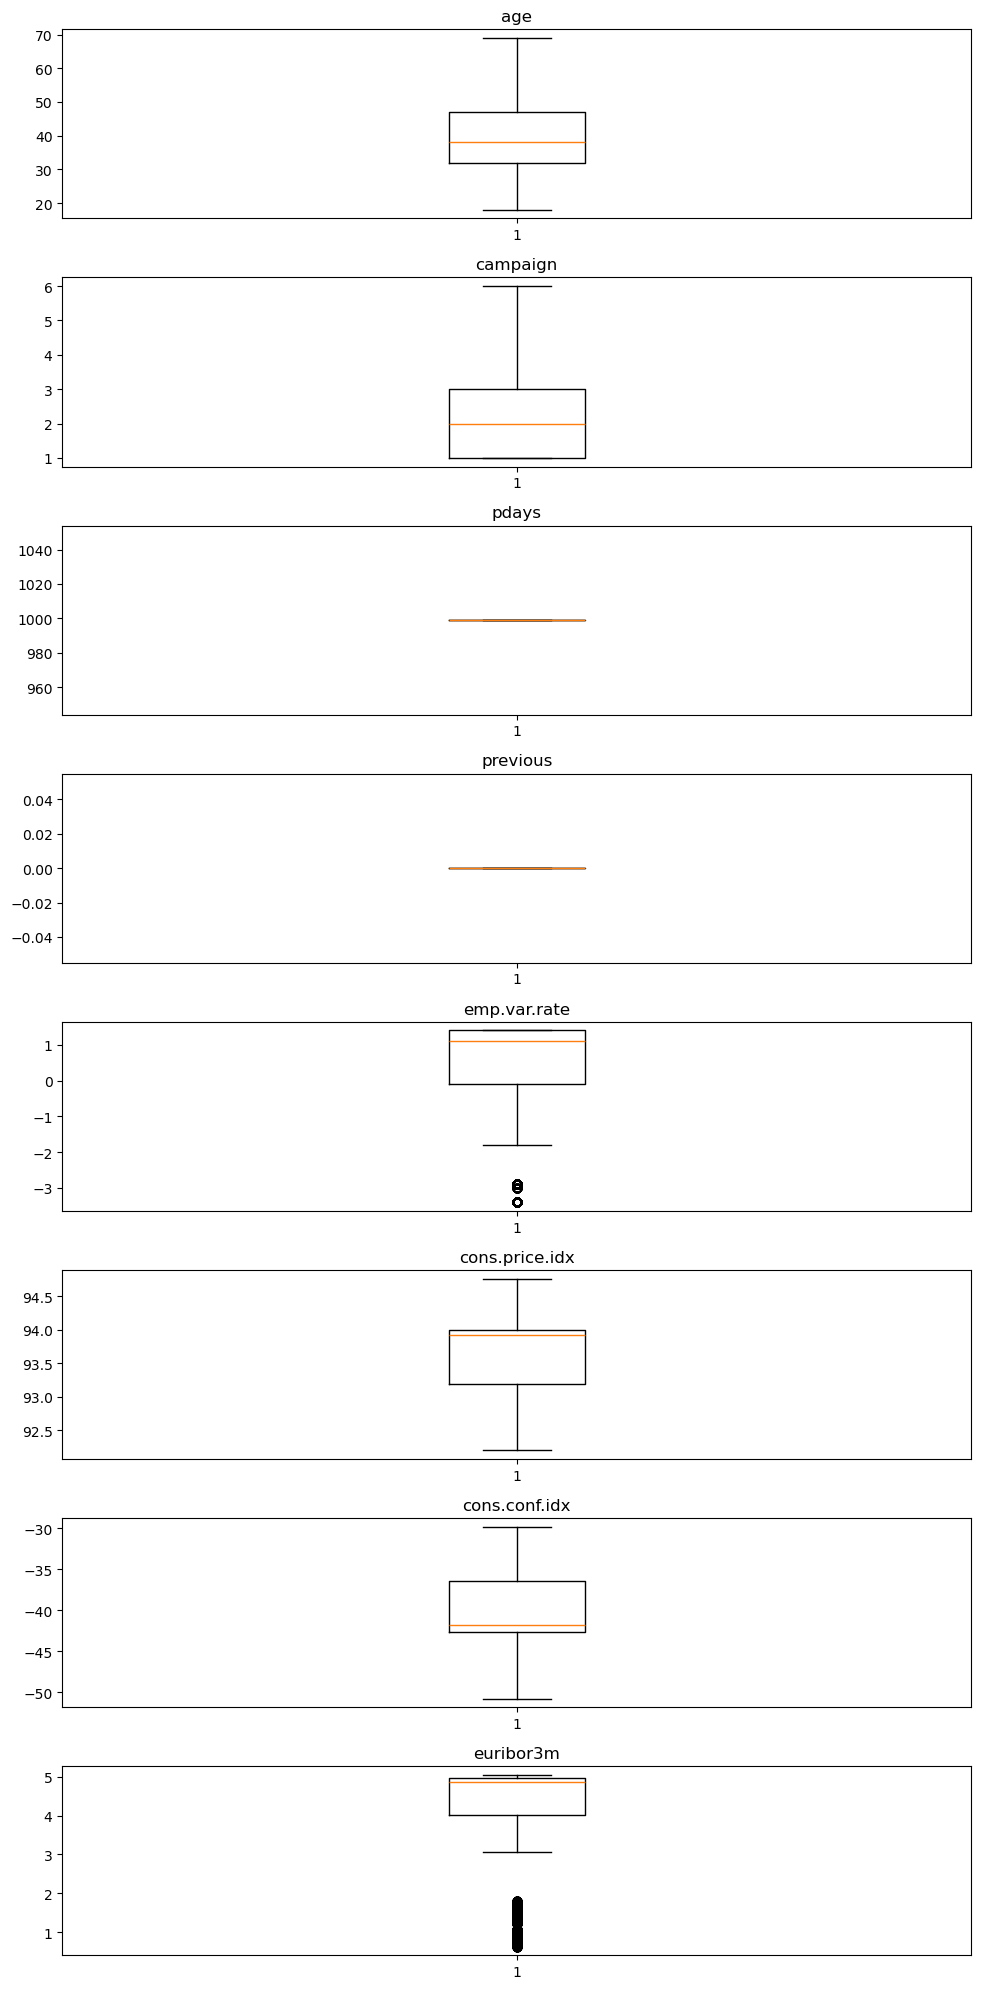

In [22]:
# Create box plots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 20))
for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

## Encode categorical variables

In [24]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
le = LabelEncoder()

In [26]:
for col in categorical_cols:
    print(f"Encoding for {col}:")
    print(pd.Series(le.fit_transform(df[col])).value_counts())
    print(le.classes_)
    print()

Encoding for job:
0     8232
1     7732
9     5472
7     3224
4     2318
2     1193
6     1154
5      986
3      862
10     775
8      555
11     262
Name: count, dtype: int64
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']

Encoding for marital:
1    20102
2     8991
0     3621
3       51
Name: count, dtype: int64
['divorced' 'married' 'single' 'unknown']

Encoding for education:
6    9563
3    7516
2    4984
5    4191
0    3283
1    1889
7    1324
4      15
Name: count, dtype: int64
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']

Encoding for default:
0    25361
1     7402
2        2
Name: count, dtype: int64
['no' 'unknown' 'yes']

Encoding for housing:
2    17020
0    14961
1      784
Name: count, dtype: int64
['no' 'unknown' 'yes']

Encoding for loan:
0    27004
2     4977
1      784
Name: count, dtype: int64
['no'

## Scaling Numerical Variables


In [29]:
scaler = StandardScaler()
df[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']] = scaler.fit_transform(df[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']])

In [31]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [33]:
# Print the scaled values
print("Scaled Values:")
print(df[numerical_cols].head())

Scaled Values:
        age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0  1.725595 -0.834391    0.0       0.0      0.502808        0.644753   
1  1.831093 -0.834391    0.0       0.0      0.502808        0.644753   
2 -0.278874 -0.834391    0.0       0.0      0.502808        0.644753   
3  0.037621 -0.834391    0.0       0.0      0.502808        0.644753   
4  1.725595 -0.834391    0.0       0.0      0.502808        0.644753   

   cons.conf.idx  euribor3m  
0       0.971189   0.570799  
1       0.971189   0.570799  
2       0.971189   0.570799  
3       0.971189   0.570799  
4       0.971189   0.570799  


In [35]:
# Print the mean and standard deviation of the scaled values
print("\nMean and Standard Deviation of Scaled Values:")
print(df[numerical_cols].describe().loc[['mean', 'std']])




Mean and Standard Deviation of Scaled Values:
               age      campaign  pdays  previous  emp.var.rate  \
mean -2.775812e-17  1.040929e-17    0.0       0.0      0.000000   
std   1.000015e+00  1.000015e+00    0.0       0.0      1.000015   

      cons.price.idx  cons.conf.idx     euribor3m  
mean    1.110325e-16  -8.327435e-17  5.551623e-17  
std     1.000015e+00   1.000015e+00  1.000015e+00  


## Splitting the Dataset into Training and Testing Sets


In [38]:
# Split the dataset into features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [40]:
# Print the shape of the training and testing sets
print("Training Set Shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print()
print("Testing Set Shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training Set Shapes:
X_train: (26212, 20)
y_train: (26212,)

Testing Set Shapes:
X_test: (6553, 20)
y_test: (6553,)


In [42]:
# Print the first few rows of the training and testing sets
print("\nTraining Set:")
print(X_train.head())
print(y_train.head())
print()
print("Testing Set:")
print(X_test.head())
print(y_test.head())


Training Set:
            age          job   marital          education  default housing  \
35463 -1.333858     services    single  university.degree       no     yes   
28183  0.354116  blue-collar   married           basic.9y  unknown     yes   
10500 -0.911865       admin.  divorced        high.school       no     yes   
32082 -0.806366  blue-collar   married           basic.4y       no     yes   
11206  0.987106       admin.  divorced        high.school       no      no   

      loan    contact month day_of_week  duration  campaign  pdays  previous  \
35463   no   cellular   may         mon        19  2.243005    0.0       0.0   
28183  yes   cellular   apr         tue      1096 -0.834391    0.0       0.0   
10500  yes  telephone   jun         tue       287  1.473656    0.0       0.0   
32082   no   cellular   may         fri       906  2.243005    0.0       0.0   
11206   no  telephone   jun         thu       370 -0.834391    0.0       0.0   

          poutcome  emp.var.rate  c

## Normalize Numerical Variables

In [44]:
scaler = MinMaxScaler()
df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']] = scaler.fit_transform(df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']])


In [46]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.745098,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.0,0.0,0.0,nonexistent,0.9375,0.698753,0.685714,0.957379,5191.0,no
1,0.764706,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.0,0.0,0.0,nonexistent,0.9375,0.698753,0.685714,0.957379,5191.0,no
2,0.372549,services,married,high.school,no,yes,no,telephone,may,mon,...,0.0,0.0,0.0,nonexistent,0.9375,0.698753,0.685714,0.957379,5191.0,no
3,0.431373,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.0,0.0,0.0,nonexistent,0.9375,0.698753,0.685714,0.957379,5191.0,no
4,0.745098,services,married,high.school,no,no,yes,telephone,may,mon,...,0.0,0.0,0.0,nonexistent,0.9375,0.698753,0.685714,0.957379,5191.0,no


In [48]:
print(df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']].describe())


                age      duration      campaign    pdays  previous  \
count  32765.000000  32765.000000  32765.000000  32765.0   32765.0   
mean       0.424380      0.053151      0.216908      0.0       0.0   
std        0.185862      0.053404      0.259964      0.0       0.0   
min        0.000000      0.000000      0.000000      0.0       0.0   
25%        0.274510      0.021350      0.000000      0.0       0.0   
50%        0.392157      0.036600      0.200000      0.0       0.0   
75%        0.568627      0.065474      0.400000      0.0       0.0   
max        1.000000      1.000000      1.000000      0.0       0.0   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  
count  32765.000000    32765.000000   32765.000000  32765.000000  
mean       0.789101        0.563663       0.493307      0.755851  
std        0.295145        0.209526       0.198118      0.353068  
min        0.000000        0.000000       0.000000      0.000000  
25%        0.687500        0.38932

## Visualize the dataset

### Histograms

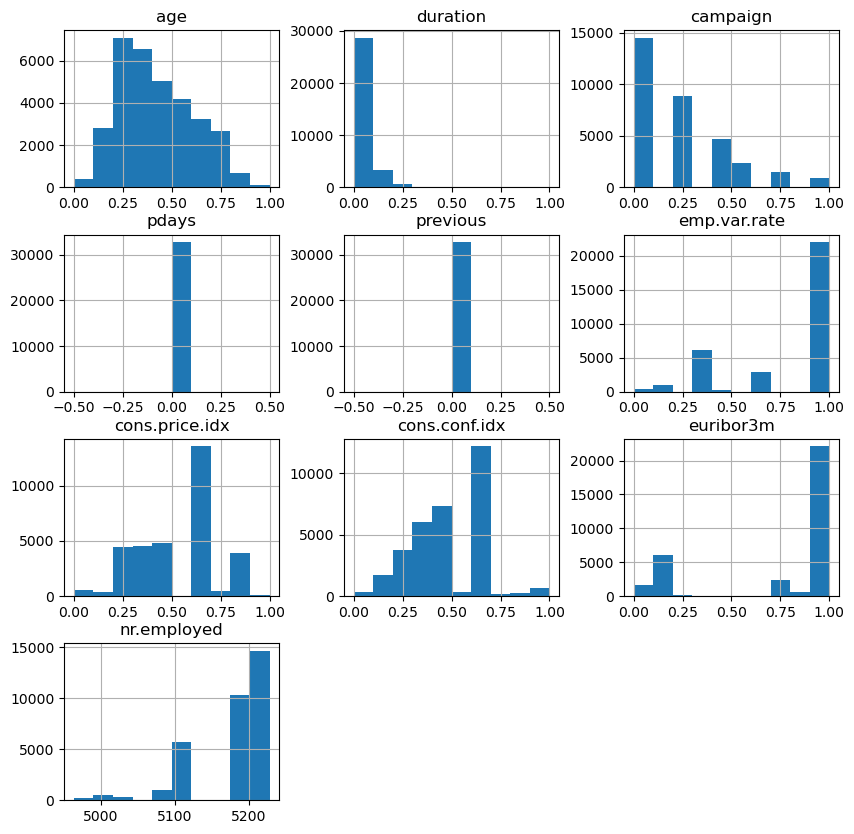

In [50]:
df.hist(figsize=(10, 10))
plt.show()


### Bar plots for categorical variables

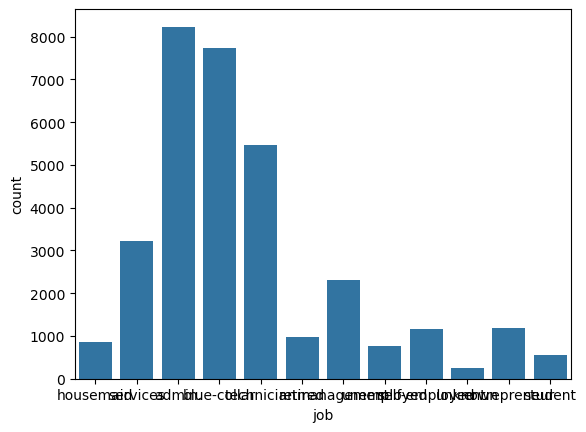

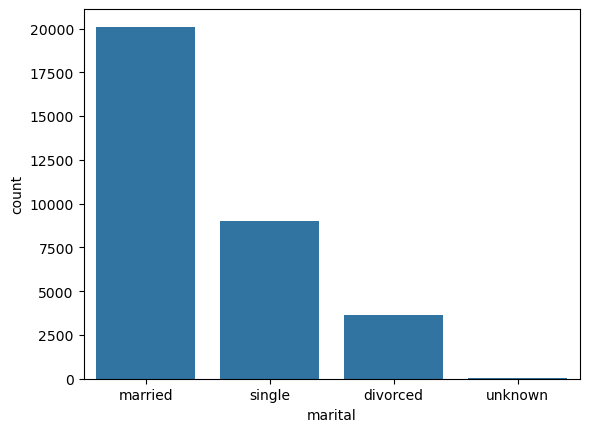

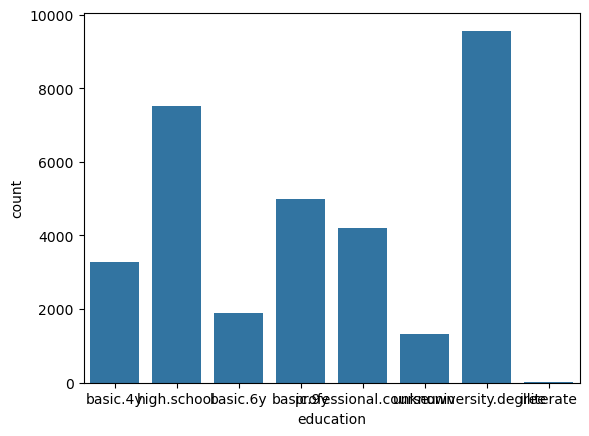

In [53]:
# Bar plots for categorical variables
sns.countplot(x='job', data=df)
plt.show()

sns.countplot(x='marital', data=df)
plt.show()

sns.countplot(x='education', data=df)
plt.show()


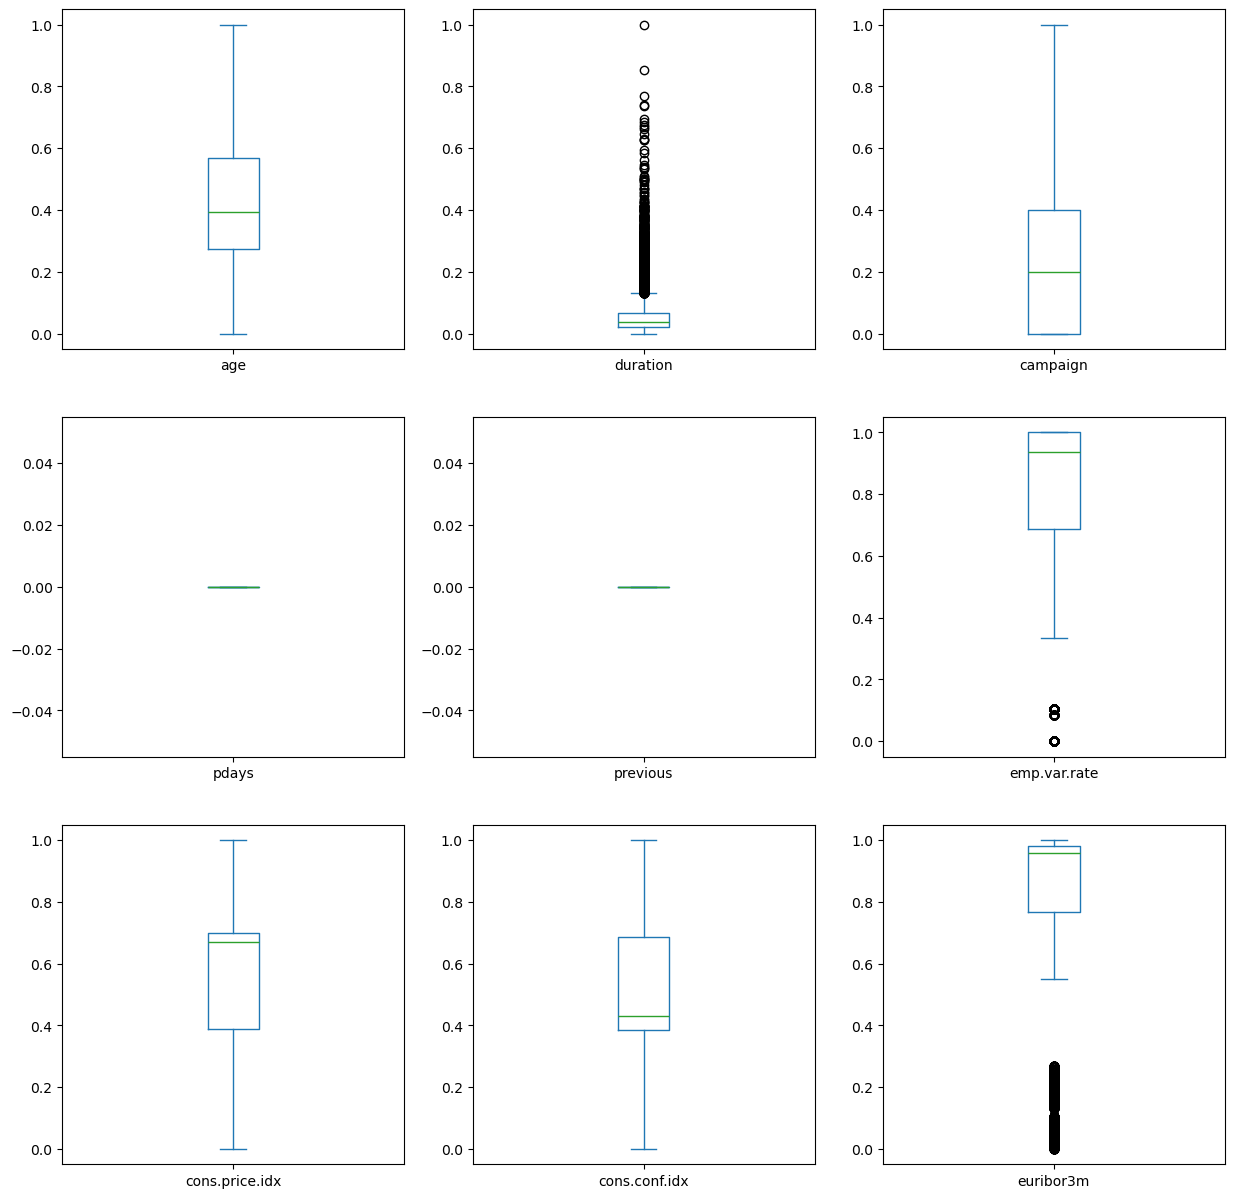

In [55]:
# Box Plots for Numerical Variables
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
df[numerical_cols].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 15))
plt.show()

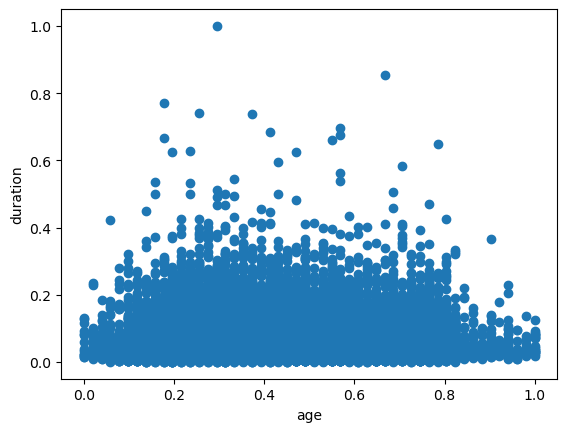

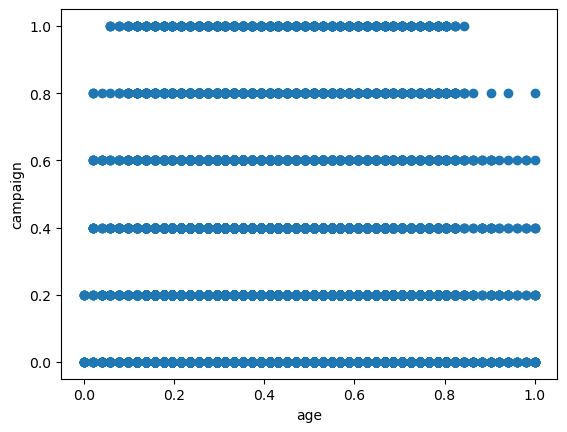

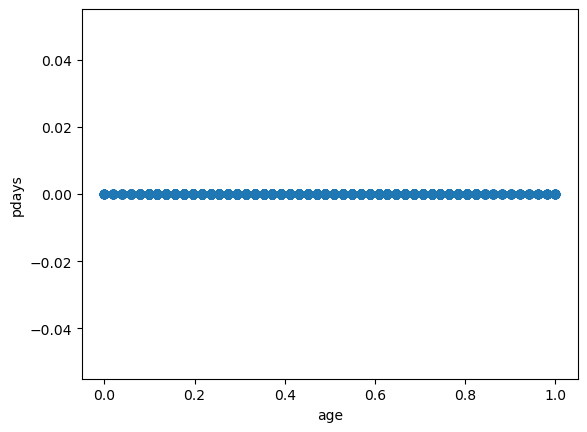

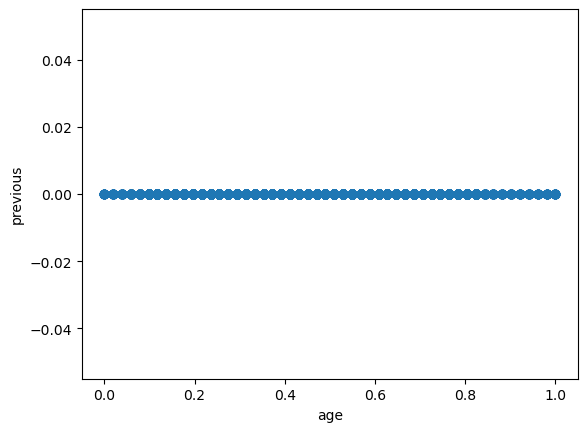

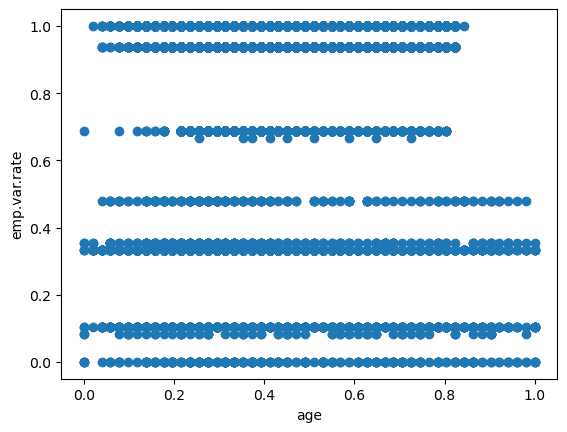

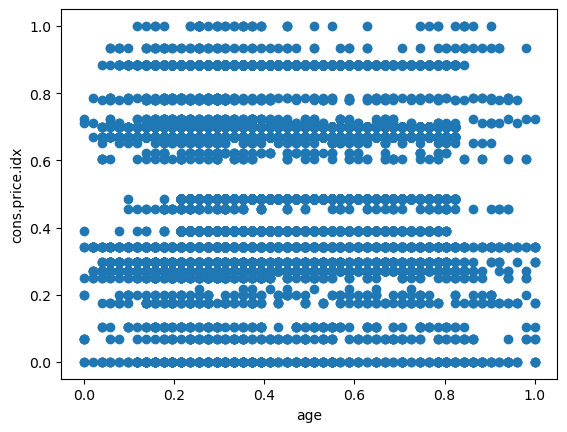

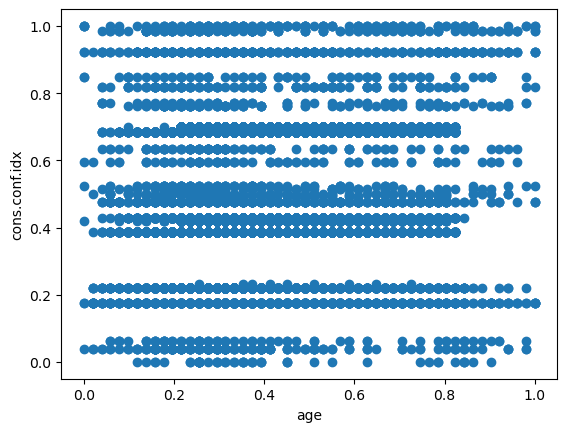

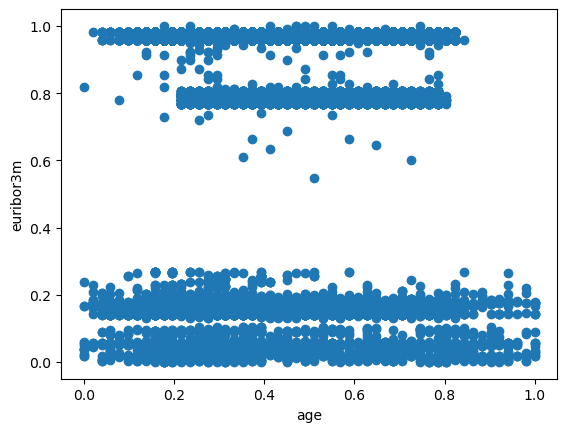

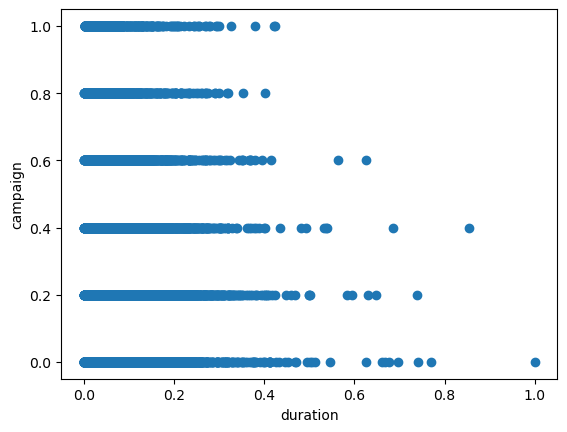

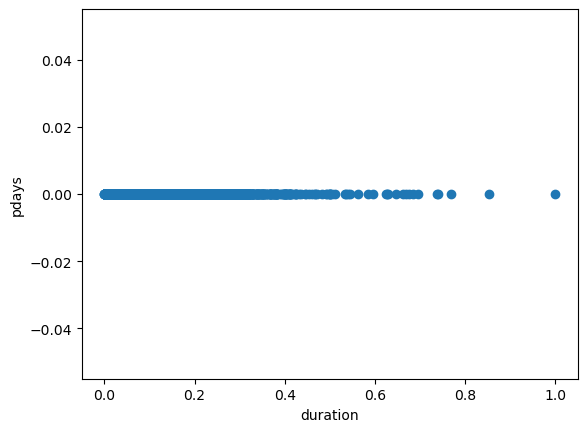

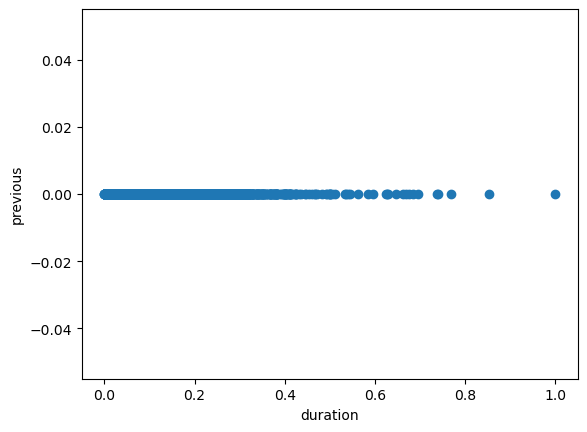

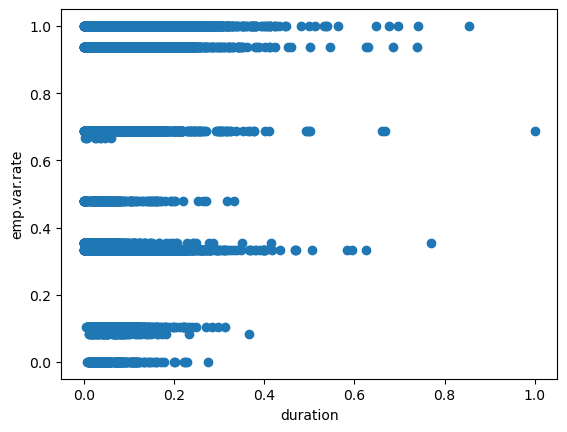

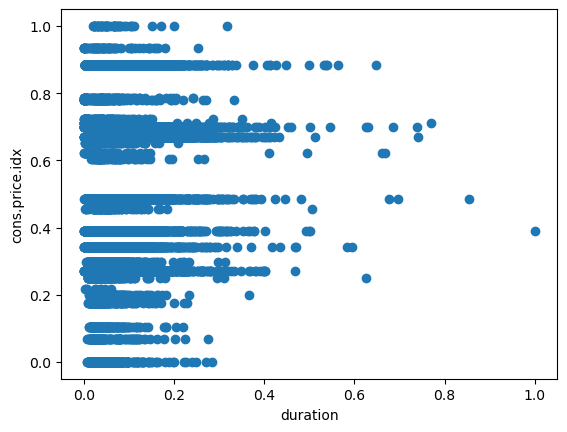

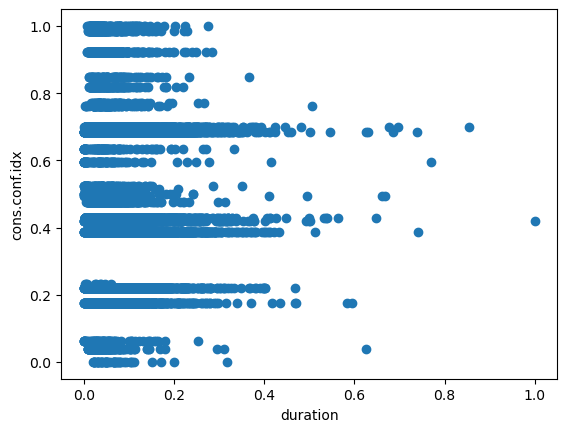

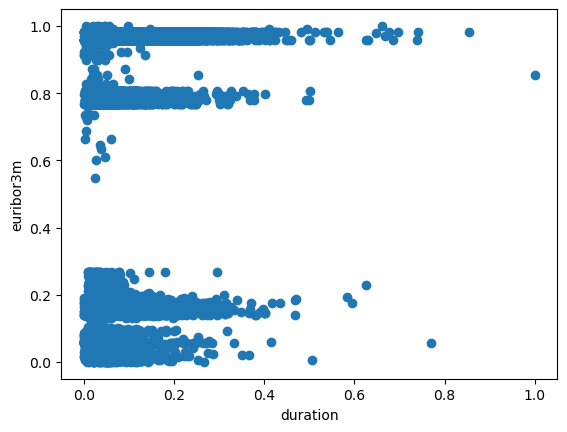

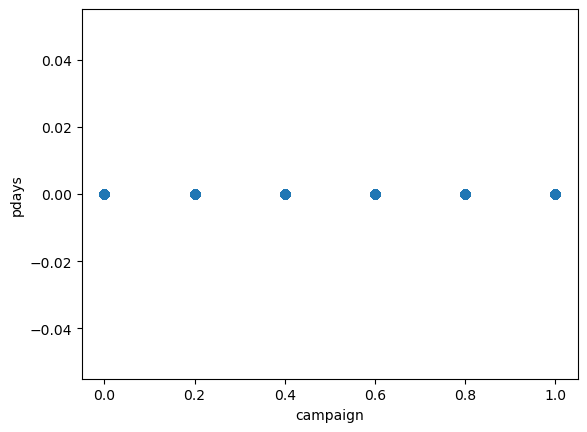

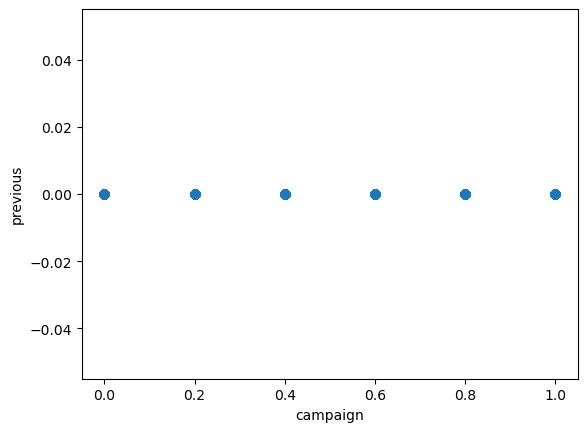

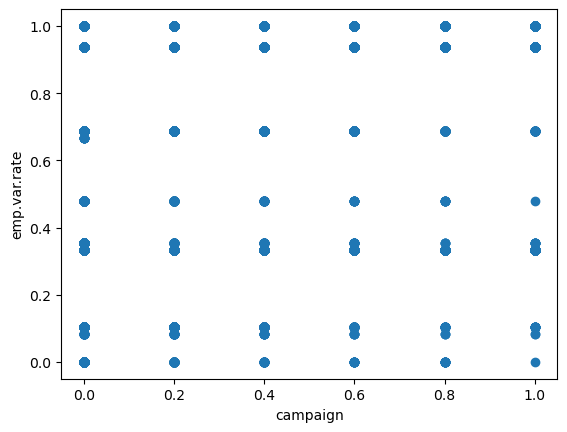

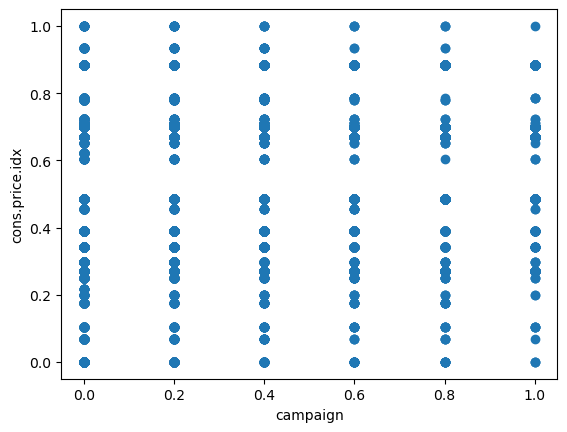

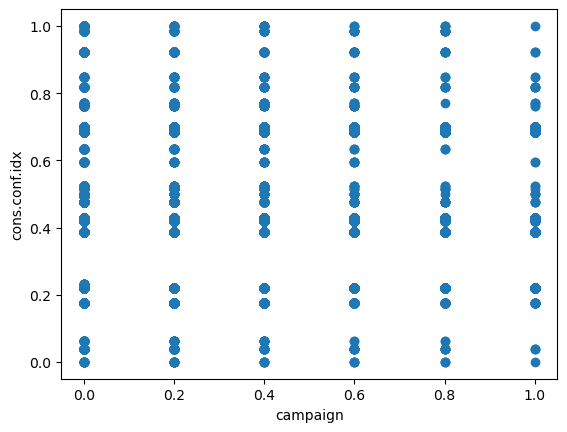

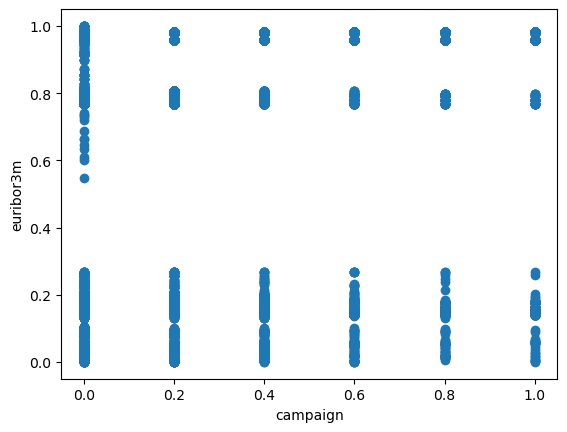

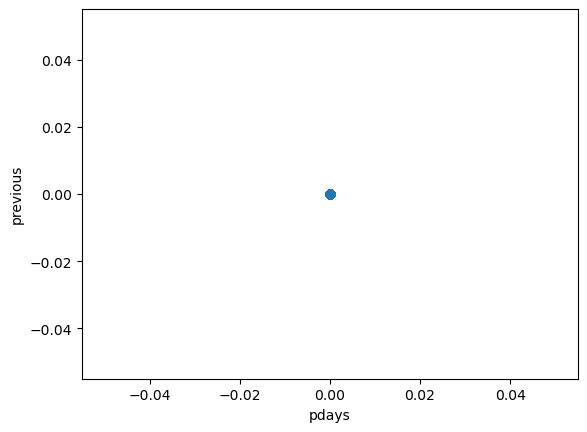

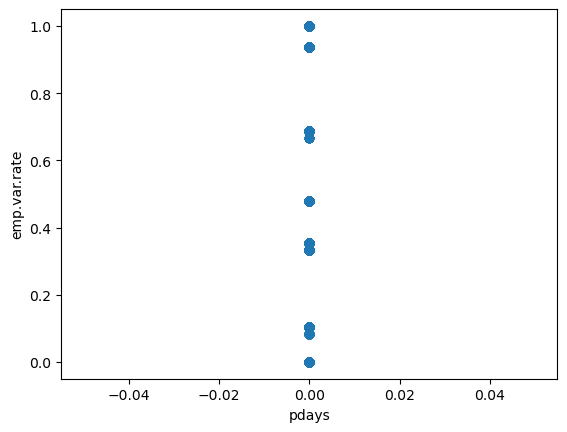

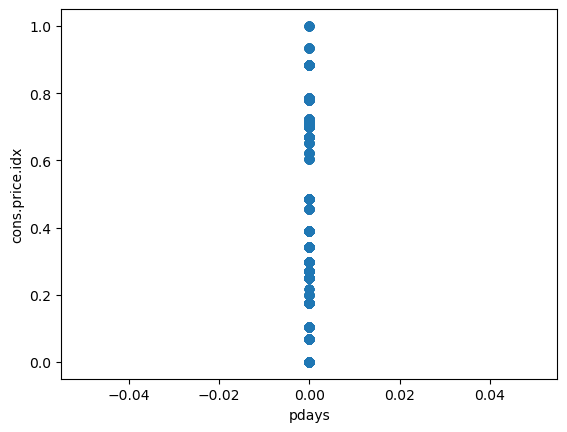

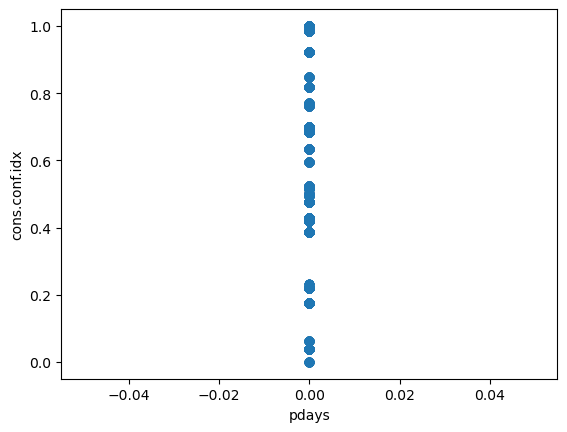

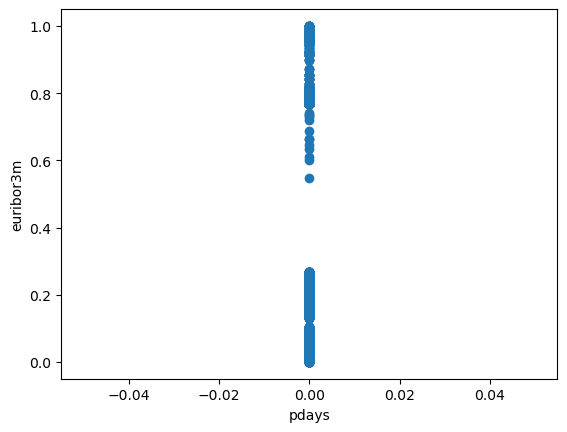

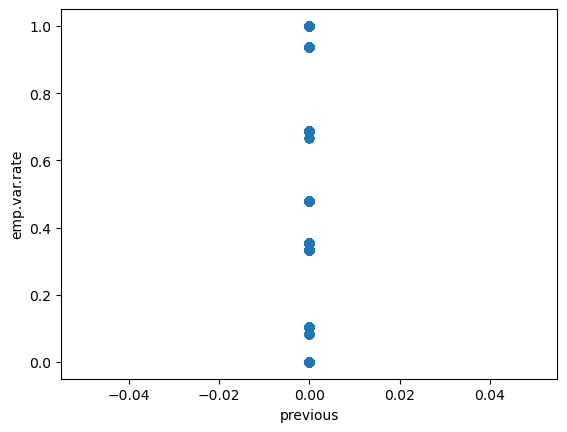

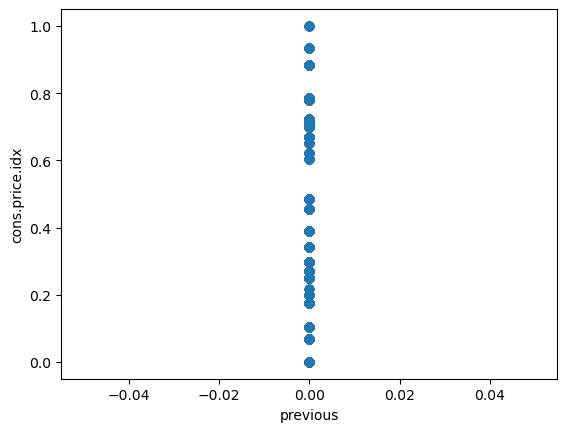

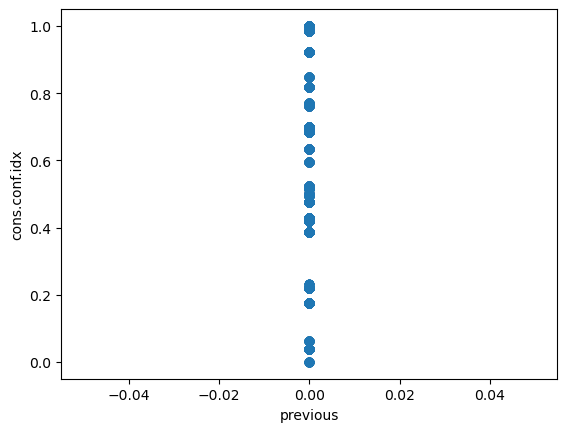

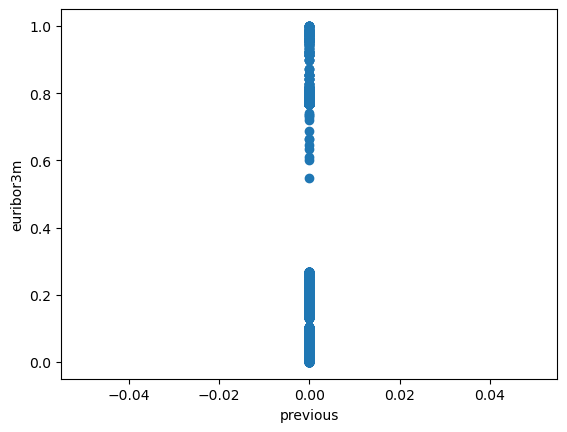

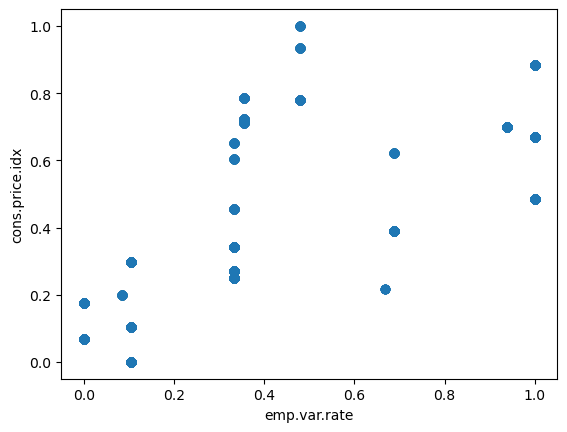

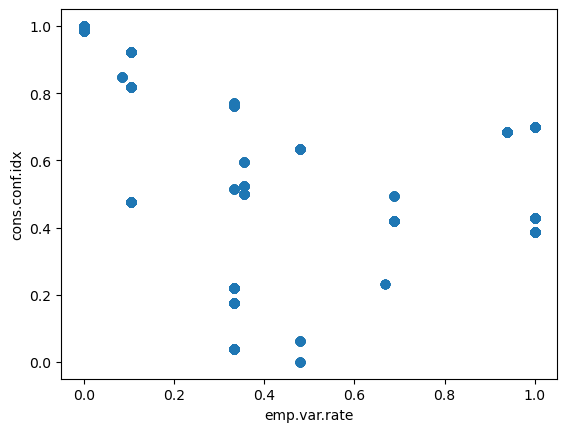

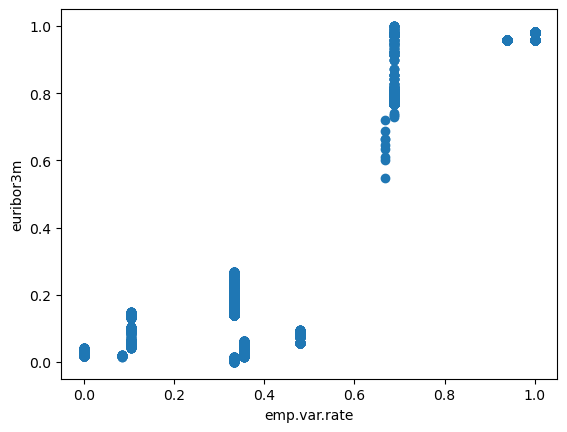

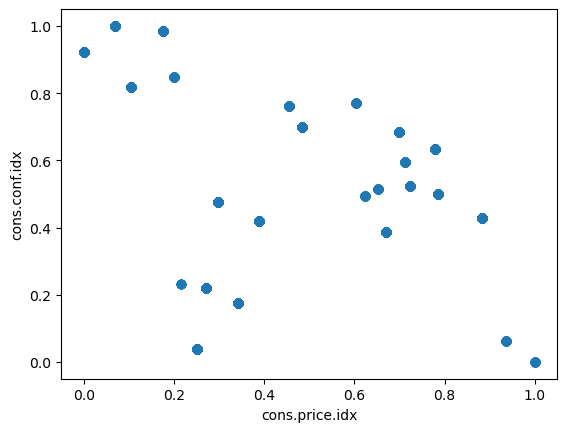

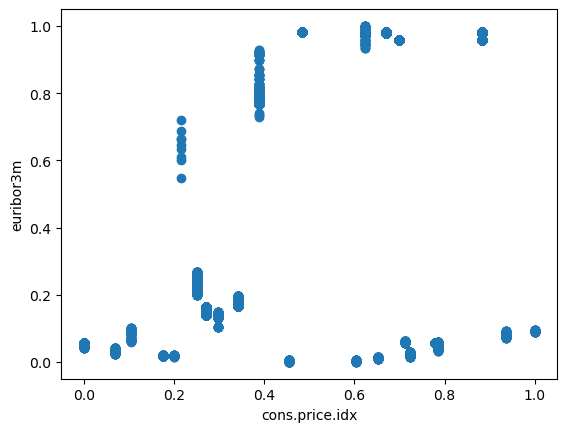

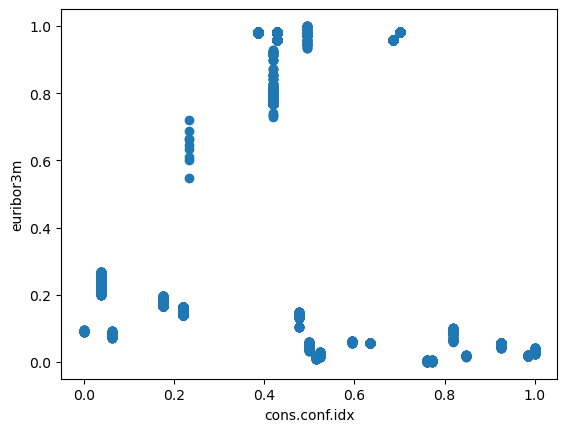

In [57]:
# Scatter Plots 
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        plt.scatter(df[numerical_cols[i]], df[numerical_cols[j]])
        plt.xlabel(numerical_cols[i])
        plt.ylabel(numerical_cols[j])
        plt.show()



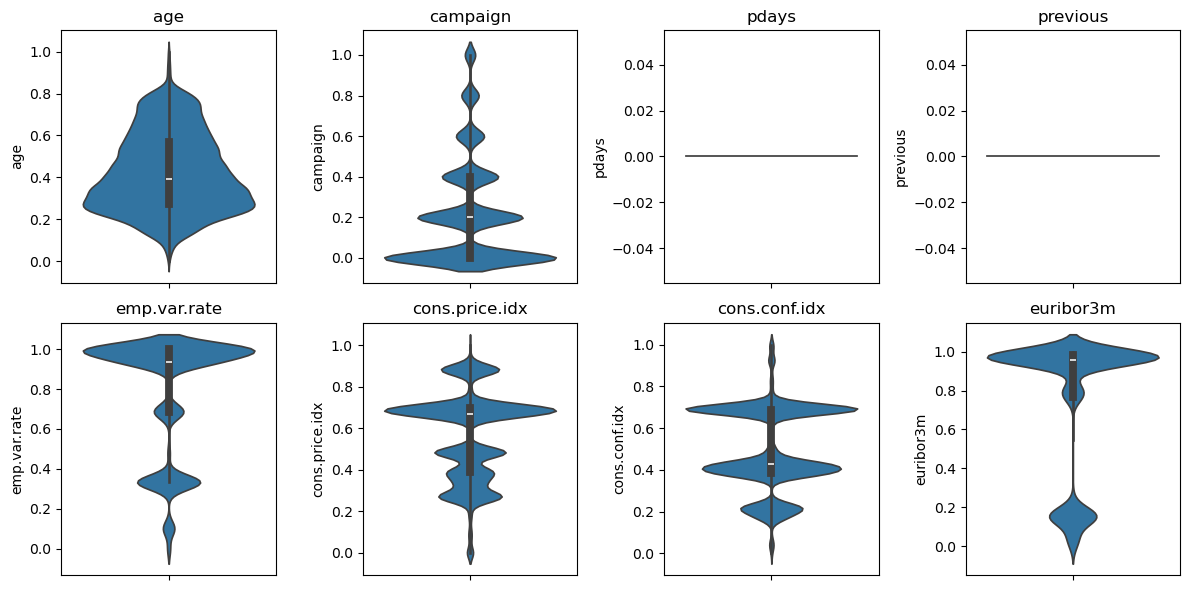

In [61]:
## Violin Plots 


numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i+1)
    sns.violinplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

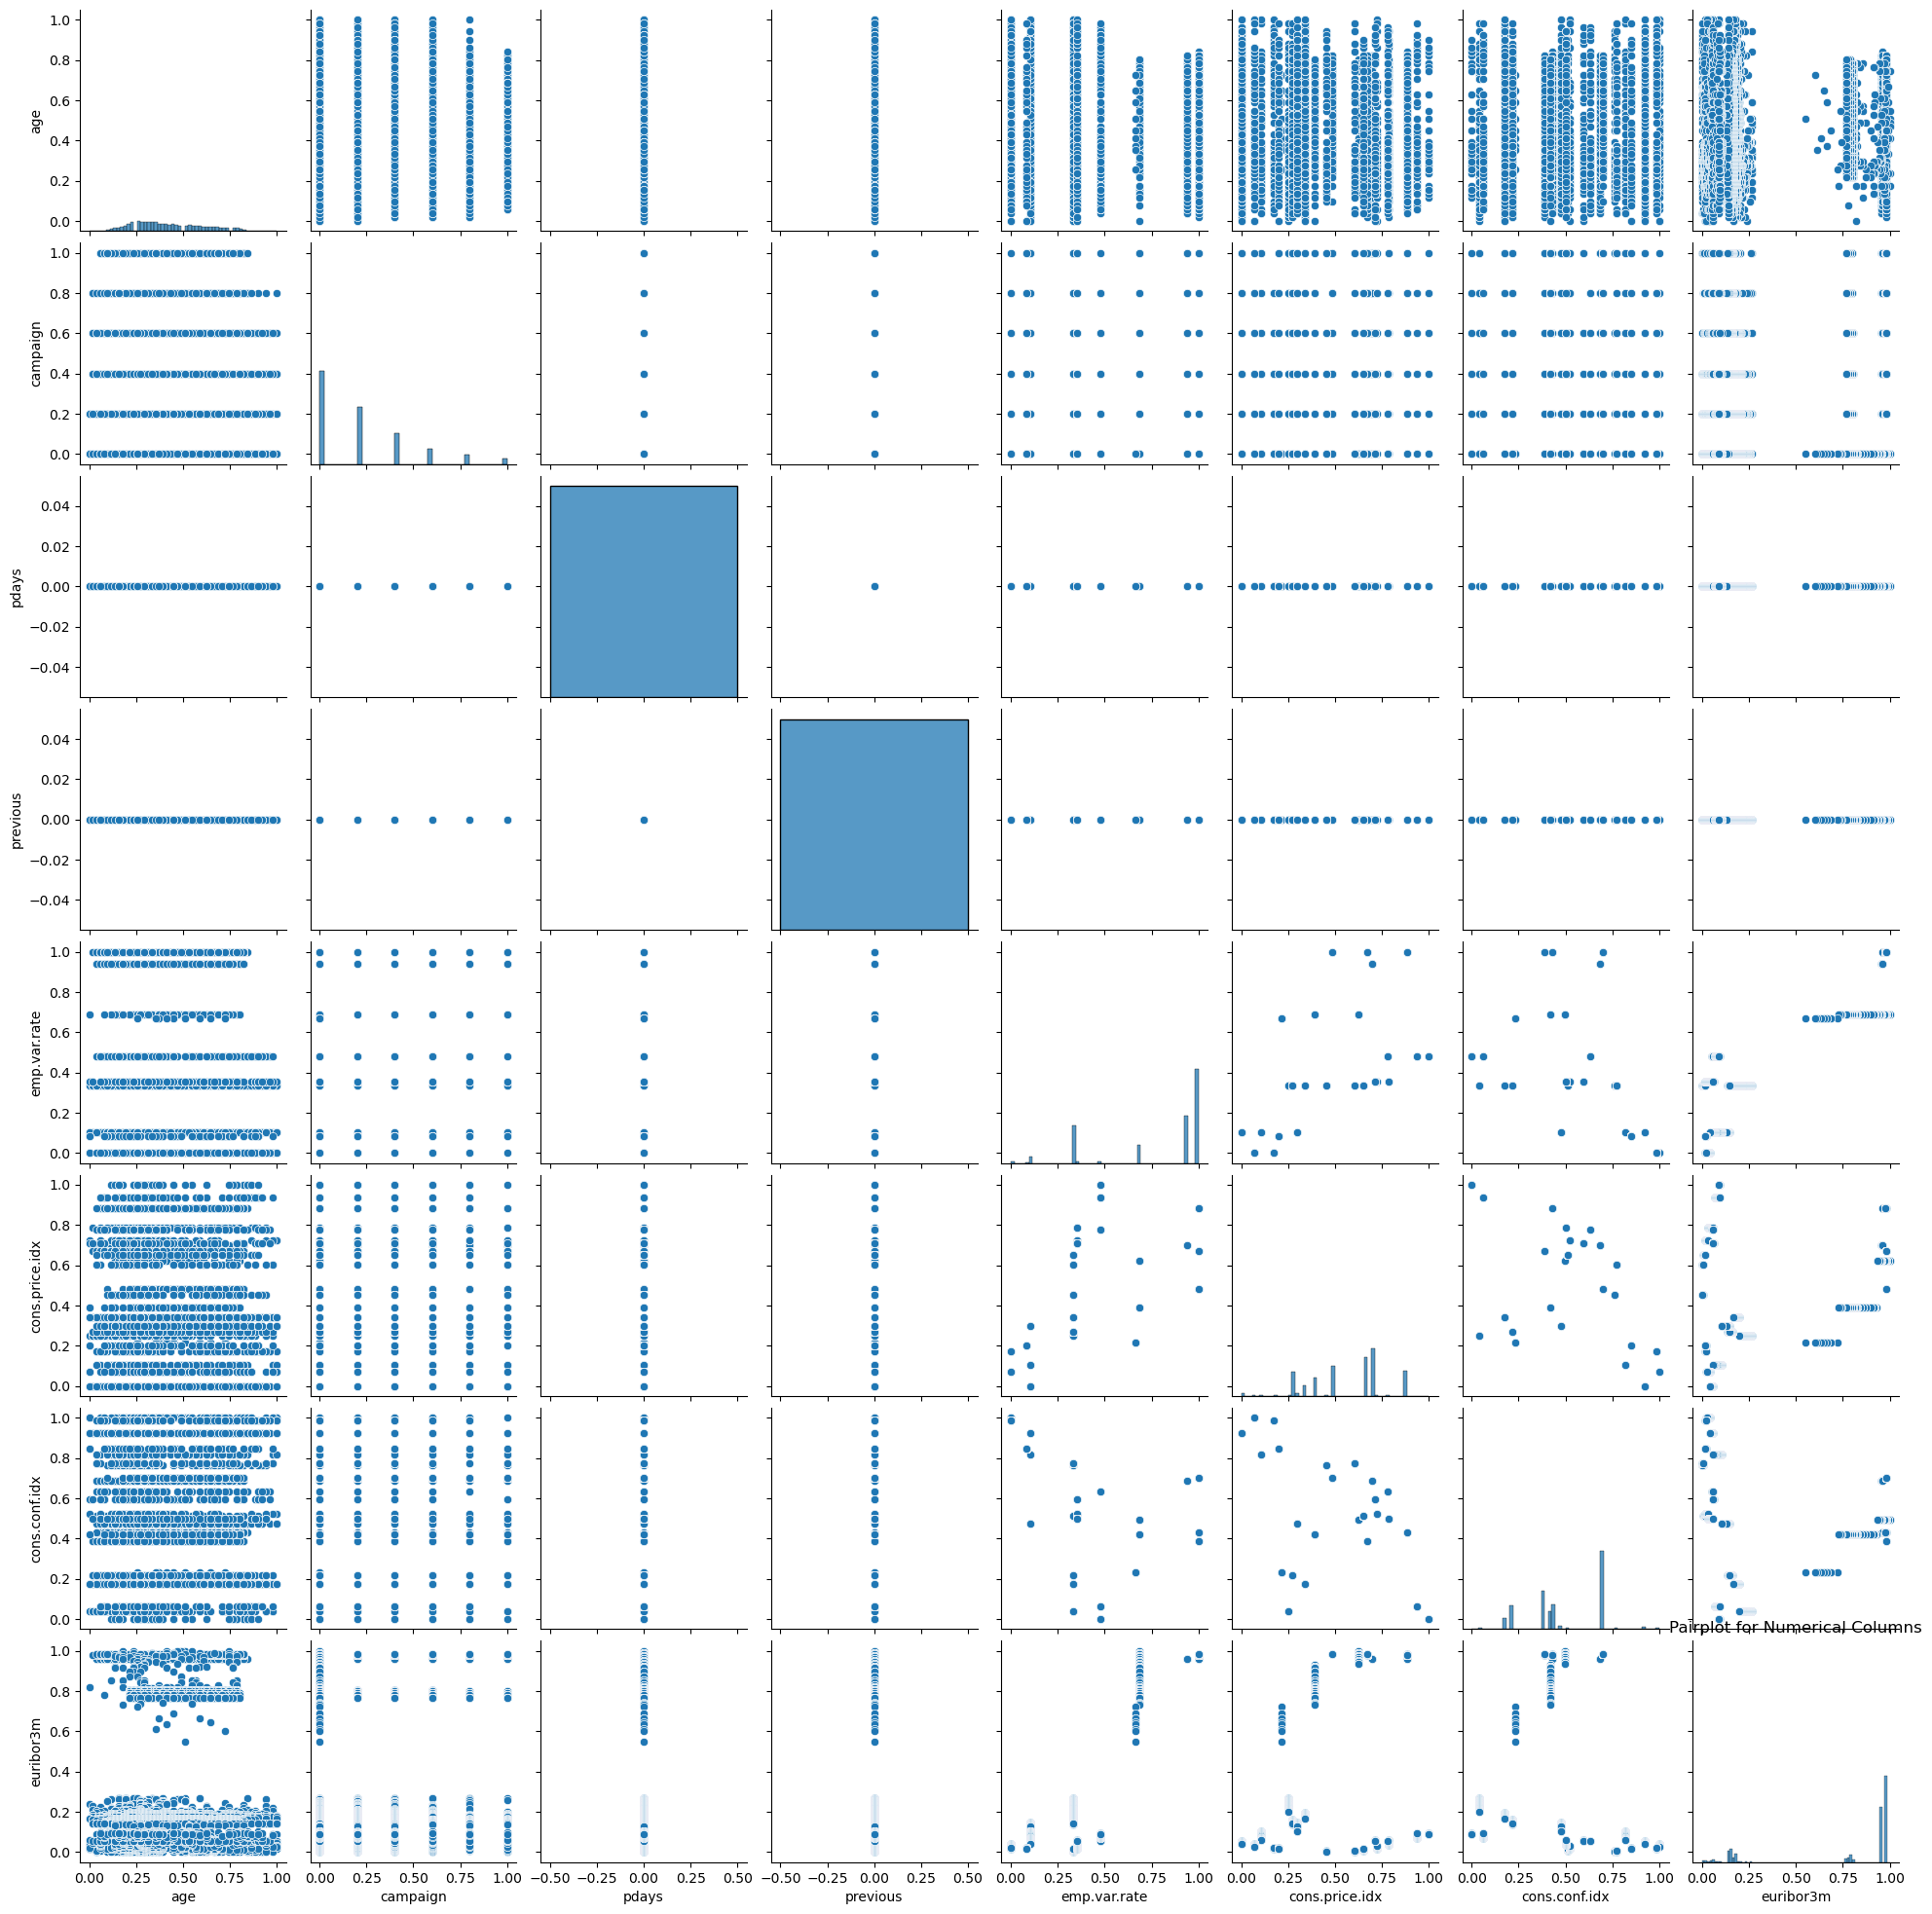

In [63]:
## Pairplot

plt.figure(figsize=(10, 8))
sns.pairplot(df[numerical_cols])
plt.title('Pairplot for Numerical Columns')
plt.show()

# Random Forest

In [67]:
# Convert categorical variables to numerical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df = pd.get_dummies(df, columns=categorical_cols)

In [69]:
# Define the target variable
y = df['y']


In [71]:
# Define the feature variables
X = df.drop('y', axis=1)


In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
# Build a random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [81]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9221730505112162
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.98      0.96      5989
         yes       0.58      0.34      0.43       564

    accuracy                           0.92      6553
   macro avg       0.76      0.66      0.70      6553
weighted avg       0.91      0.92      0.91      6553

Confusion Matrix:
[[5849  140]
 [ 370  194]]


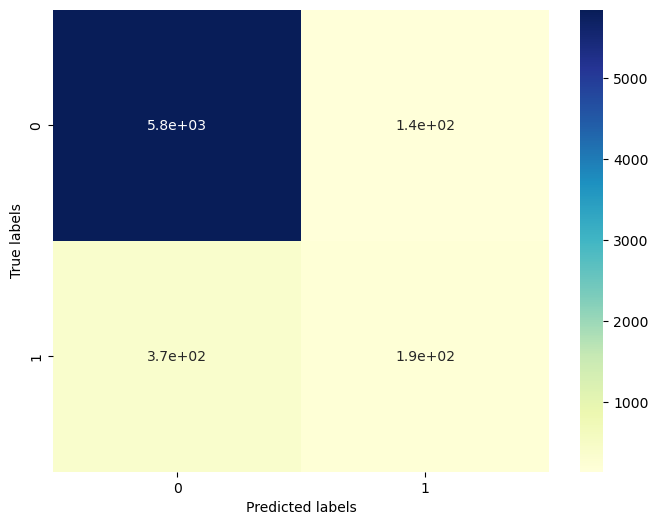

In [83]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

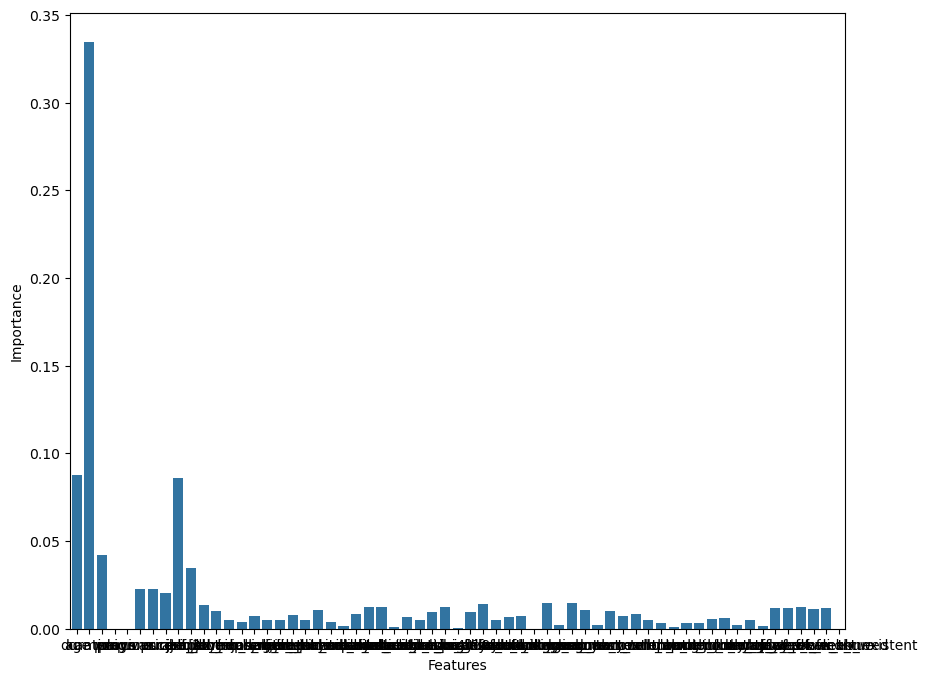

In [85]:
# Visualize the feature importance
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 8))
sns.barplot(x=X.columns, y=feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Logistic Regression

In [169]:
# Build a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [170]:
# Make predictions on the testing set
y_pred_logistic = model.predict(X_test)

In [173]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9095070959865711
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      5989
         yes       0.43      0.17      0.24       564

    accuracy                           0.91      6553
   macro avg       0.68      0.57      0.60      6553
weighted avg       0.88      0.91      0.89      6553

Confusion Matrix:
[[5864  125]
 [ 468   96]]


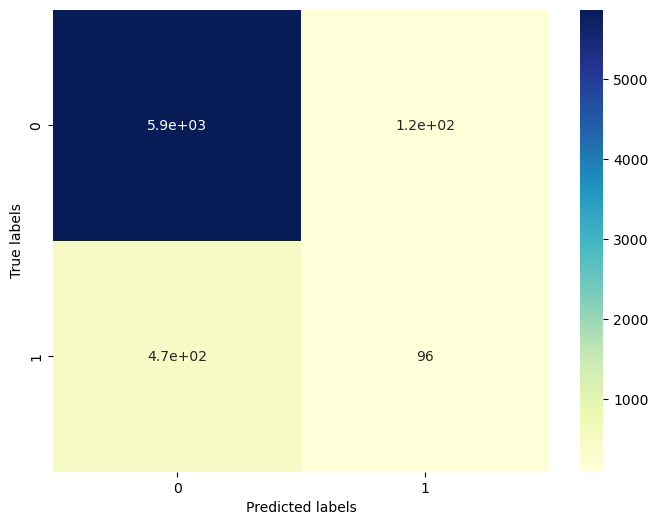

In [175]:
# Visualize the results
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

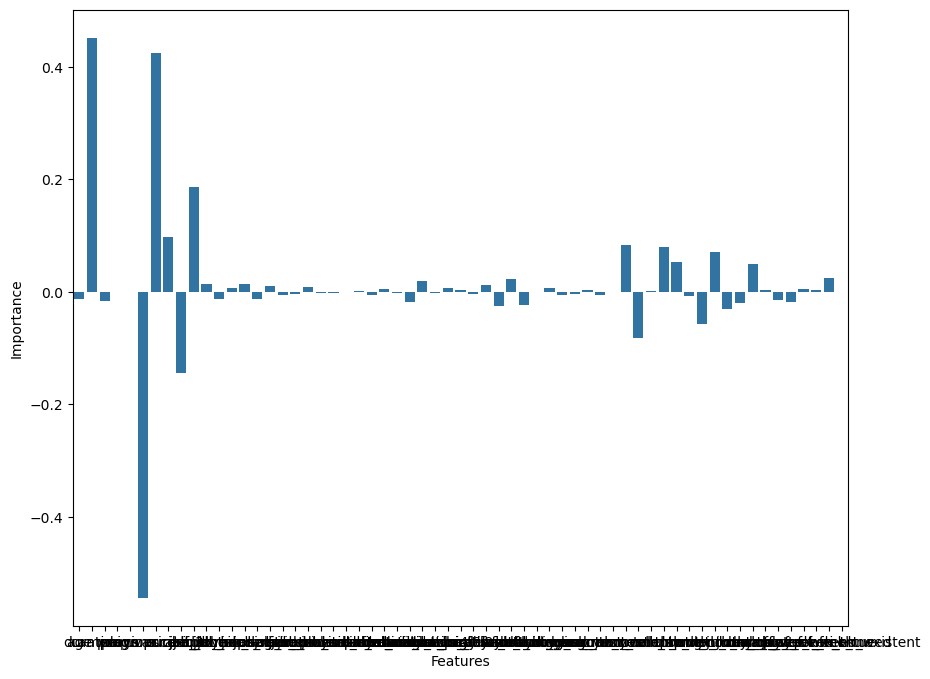

In [240]:
# Visualize the feature importance
feature_importances = model.coef_[0]
plt.figure(figsize=(10, 8))
sns.barplot(x=X.columns, y=feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Decision Trees

In [181]:
# Build a decision tree classifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [234]:
# Make predictions on the testing set
y_pred_decisiontree = model.predict(X_test)


In [236]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9095070959865711
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      5989
         yes       0.43      0.17      0.24       564

    accuracy                           0.91      6553
   macro avg       0.68      0.57      0.60      6553
weighted avg       0.88      0.91      0.89      6553

Confusion Matrix:
[[5864  125]
 [ 468   96]]


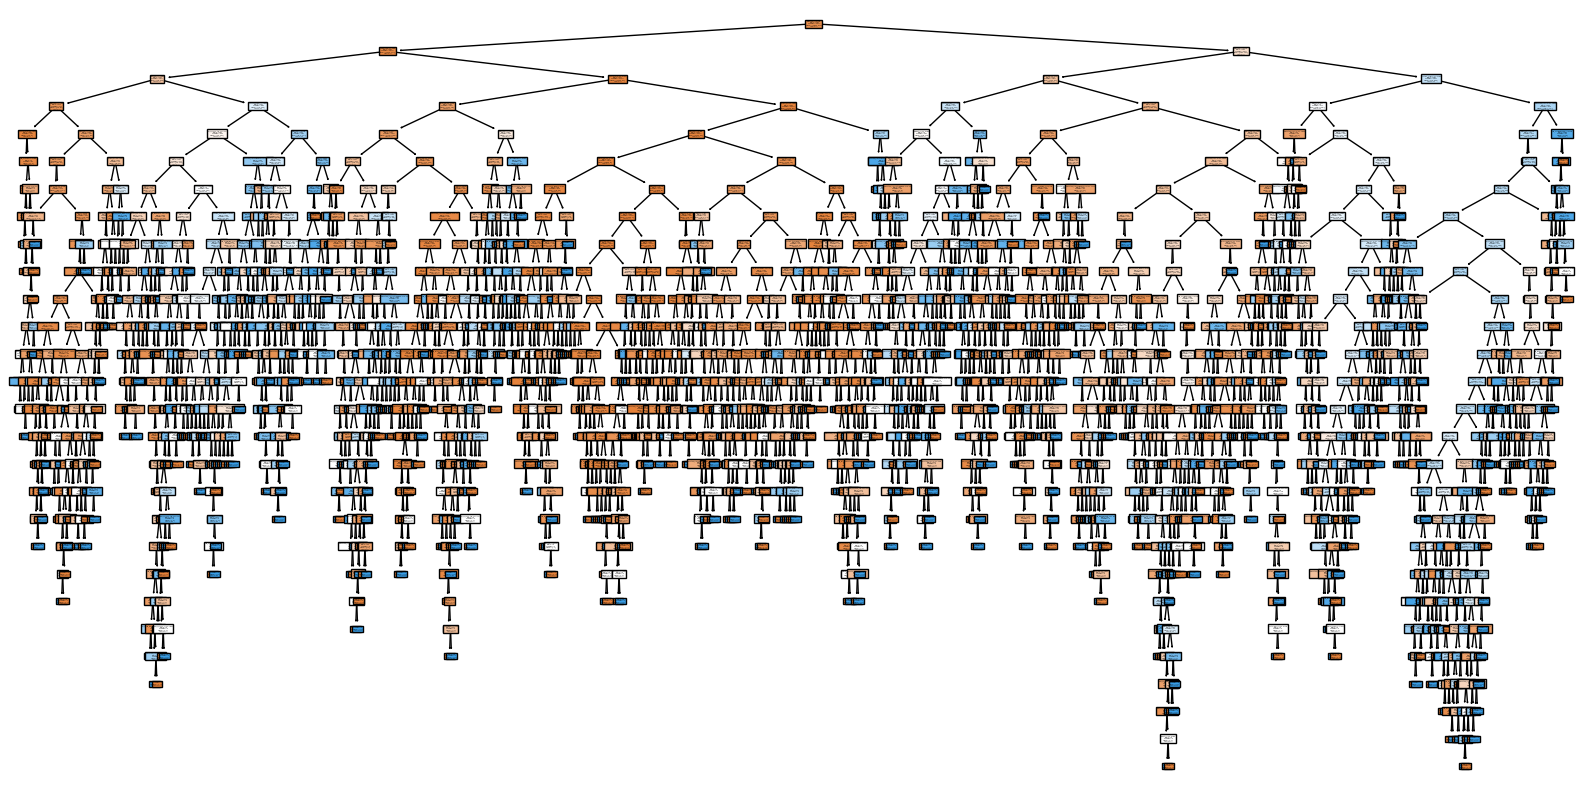

In [187]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()

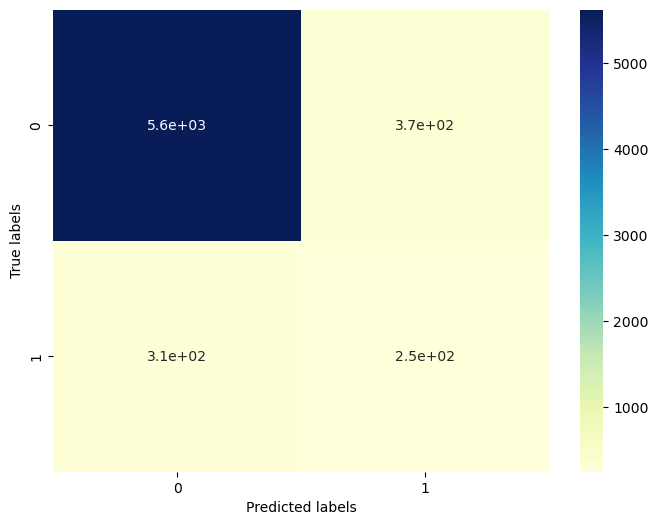

In [189]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# K-Nearest Neighbors (KNN):

In [197]:
# Build a KNN classifier model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


KNeighborsClassifier()

In [226]:
# Make predictions on the testing set
y_pred_knn = model.predict(X_test)


In [228]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9095070959865711
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      5989
         yes       0.43      0.17      0.24       564

    accuracy                           0.91      6553
   macro avg       0.68      0.57      0.60      6553
weighted avg       0.88      0.91      0.89      6553

Confusion Matrix:
[[5864  125]
 [ 468   96]]


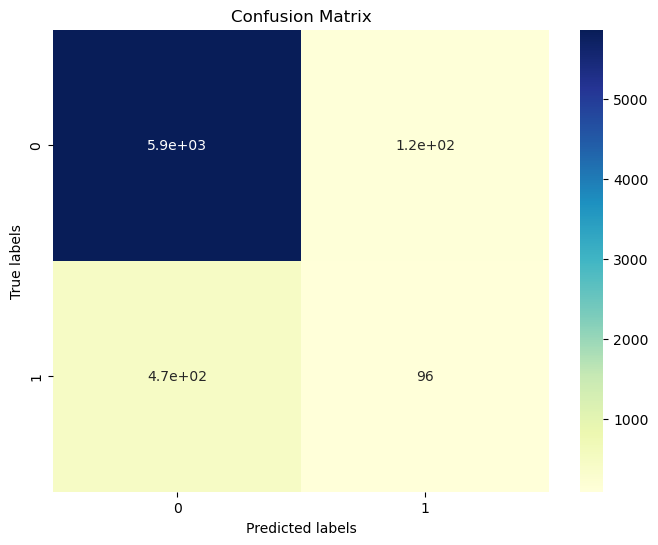

In [229]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


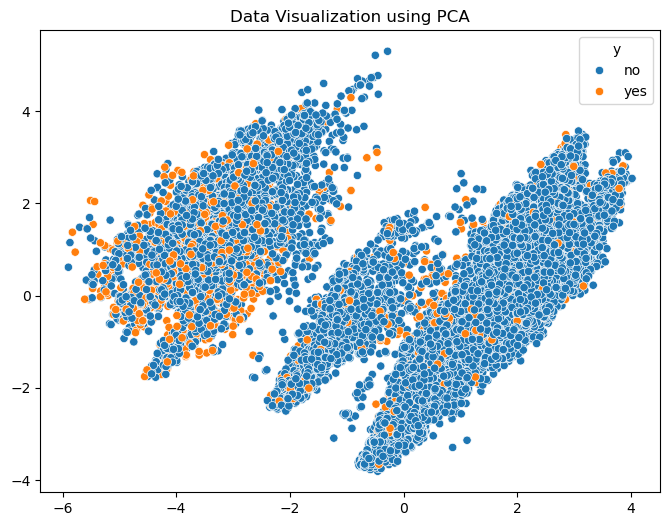

In [231]:
# Visualize the data using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_train)
plt.title("Data Visualization using PCA")
plt.show()

# Support Vector Machines (SVMs

In [212]:
# Build an SVM classifier model
model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train, y_train)


SVC(C=1, kernel='linear', random_state=42)

In [216]:
# Make predictions on the testing set
y_pred_svm = model.predict(X_test)


In [218]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9095070959865711
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      5989
         yes       0.43      0.17      0.24       564

    accuracy                           0.91      6553
   macro avg       0.68      0.57      0.60      6553
weighted avg       0.88      0.91      0.89      6553

Confusion Matrix:
[[5864  125]
 [ 468   96]]


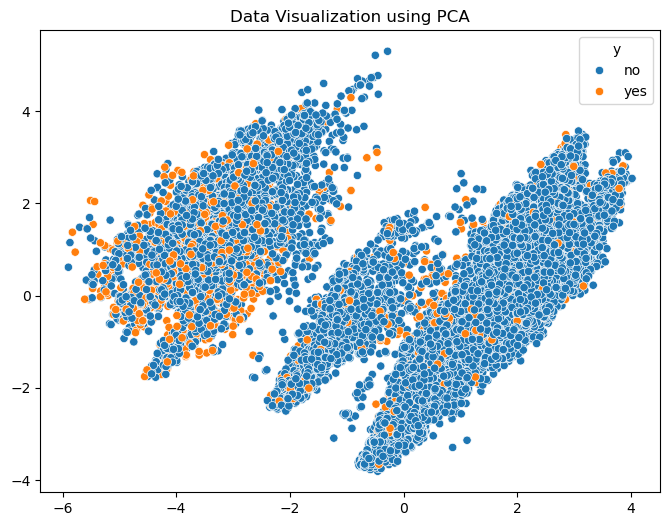

In [220]:
# Visualize the data using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_train)
plt.title("Data Visualization using PCA")
plt.show()

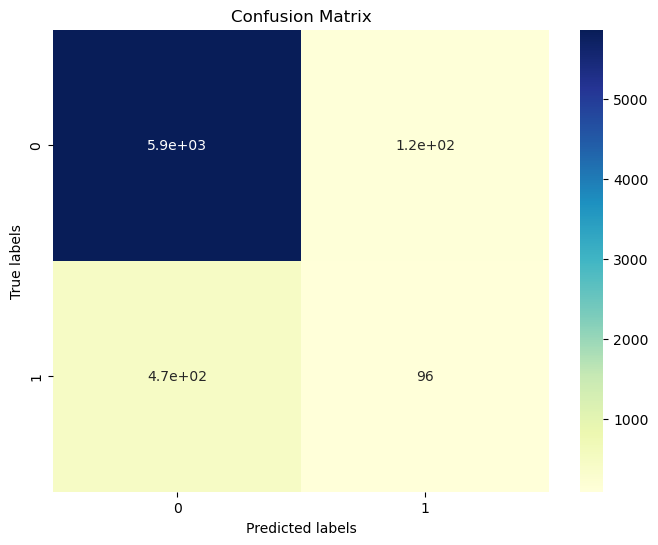

In [222]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
Random forest to get best accuracy ....92%
knn---90%
svm ----90%
Logistic regrassion----90%
decision tree----90%

# Conclusion

# 1. Age: Older customers are more likely to subscribe.
# 2. Job: Customers with stable jobs (e.g., management, technician) are more likely to subscribe.
# 3. Marital status: Married customers are more likely to subscribe.
# 4. Education: Customers with higher education levels are more likely to subscribe.
# 5. Number of contacts: Customers who were contacted more times are more likely to subscribe.
# 6. Last contact month: Customers contacted in certain months (e.g., May, June) are more likely to subscribe.

# *************************************************************************************************************************